In [85]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import speech_recognition as sr

### Speech to Text

In [88]:
# !pip install SpeechRecognition
# !pip install PyAudio

     -------------------------------------- 164.1/164.1 KB 1.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [86]:
r = sr.Recognizer()

In [89]:
with sr.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    print("الرجاء البدأ بالتحدث")
    audio = r.listen(source)

    try:
        a=r.recognize_sphinx(audio)
        print("حديثك كان  " + a.lower())
    except:
        print(" ")

الرجاء البدأ بالتحدث
 


### Text to Image

In [19]:
sentence = 'مرحبا! انا اسمي نورا'

#### Text Cleaning

In [18]:
special_characters = ['@', '!', '؟', '$', '%', '^', '*', '-', '_']

In [28]:
# Special Characters Removal
for sp in special_characters:
    sentence = sentence.replace(sp, '')

In [29]:
print(sentence)

مرحبا انا اسمي نورا


In [30]:
words = sentence.split(' ')

In [31]:
print(words)

['مرحبا', 'انا', 'اسمي', 'نورا']


#### Loading Needed Data

In [69]:
imgdir = 'data\ArASL_Database_54K_Final\ArASL_Database_54K_Final'

In [76]:
ArSL = [] # Conatins random image for each letter

In [77]:
for cla in os.listdir(imgdir):
    p = imgdir + '\\' + cla
    imgName = random.choice(os.listdir(p))
    imPath = p + '\\' + imgName
    image = cv2.imread(imPath)
    ArSL.append(image)

In [33]:
# Loading the Arabic Guide
guide = pd.read_csv('data\Arabic_Letters_Guide.csv')

In [34]:
guide.head(3)

,Phonteics,Index,Arabic_Letters
0,ain,0,ع
1,al,1,ال
2,aleff,2,ا


#### Encode

In [43]:
encoded = []

In [44]:
for word in words:
    list_code = []
    for letter in word:
        code = guide[guide['Arabic_Letters'] == letter]['Index'].iloc[0]
        list_code.append(code)
    encoded.append(list_code)

In [45]:
encoded

[[17, 19, 11, 3, 2], [2, 18, 2], [2, 21, 17, 30], [18, 28, 19, 2]]

#### Displaying Relevant Images

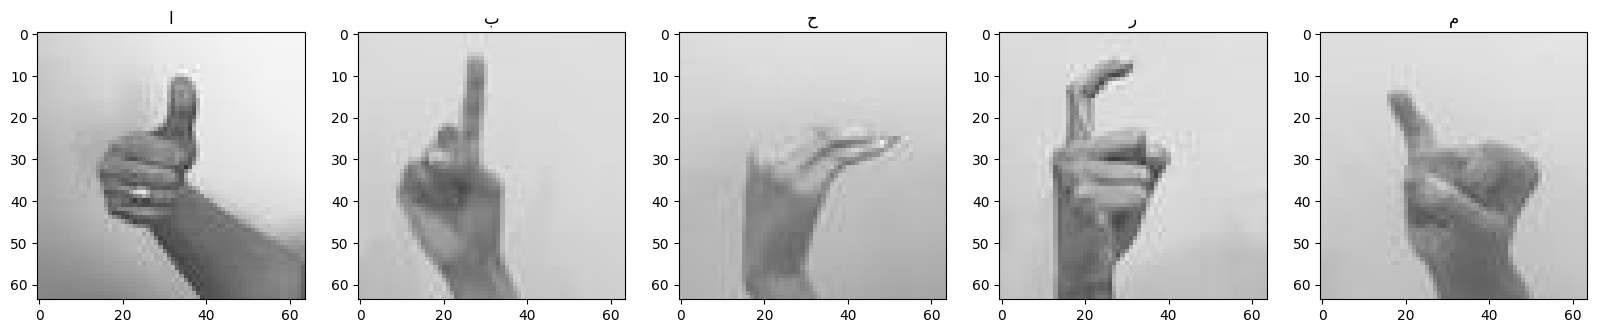

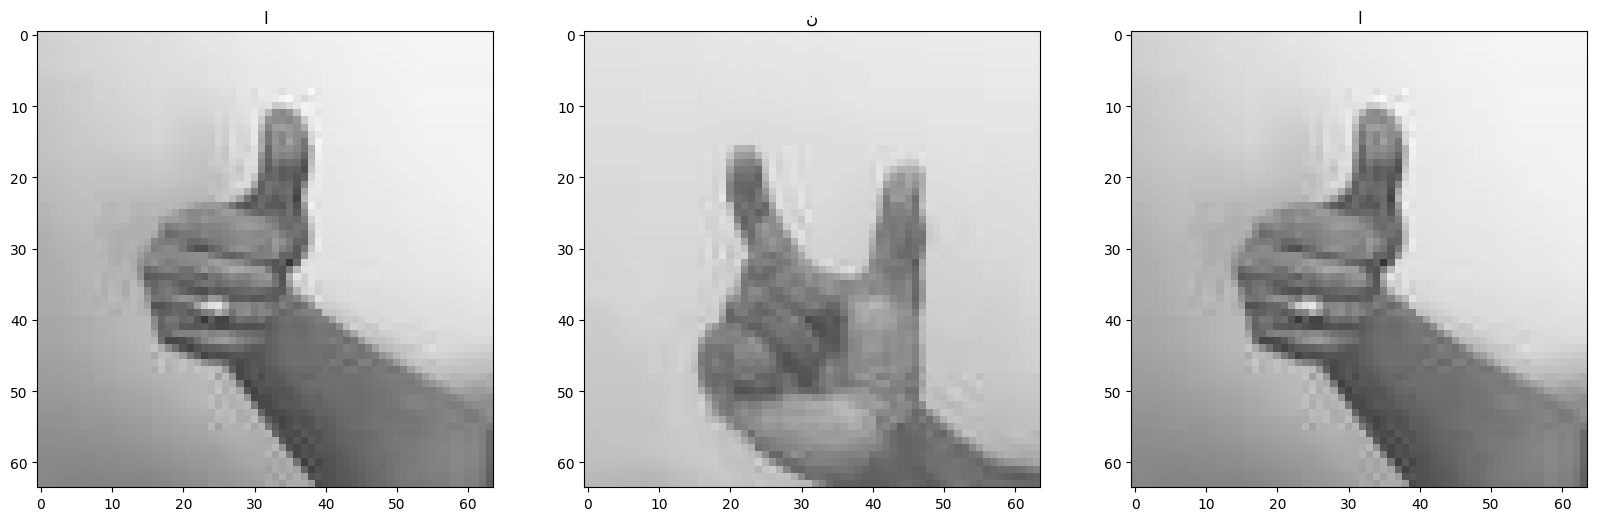

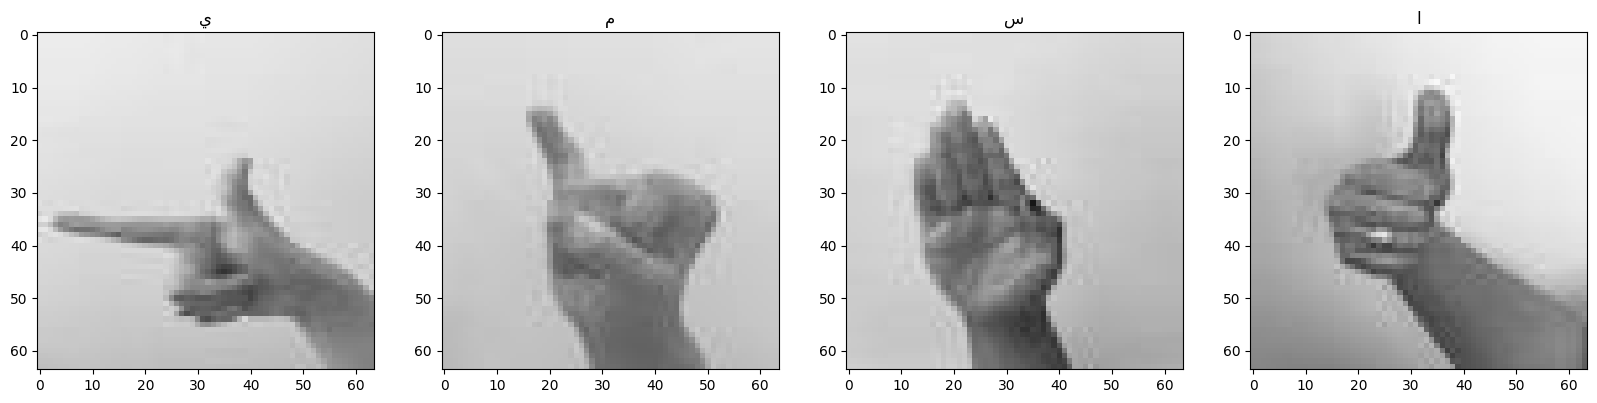

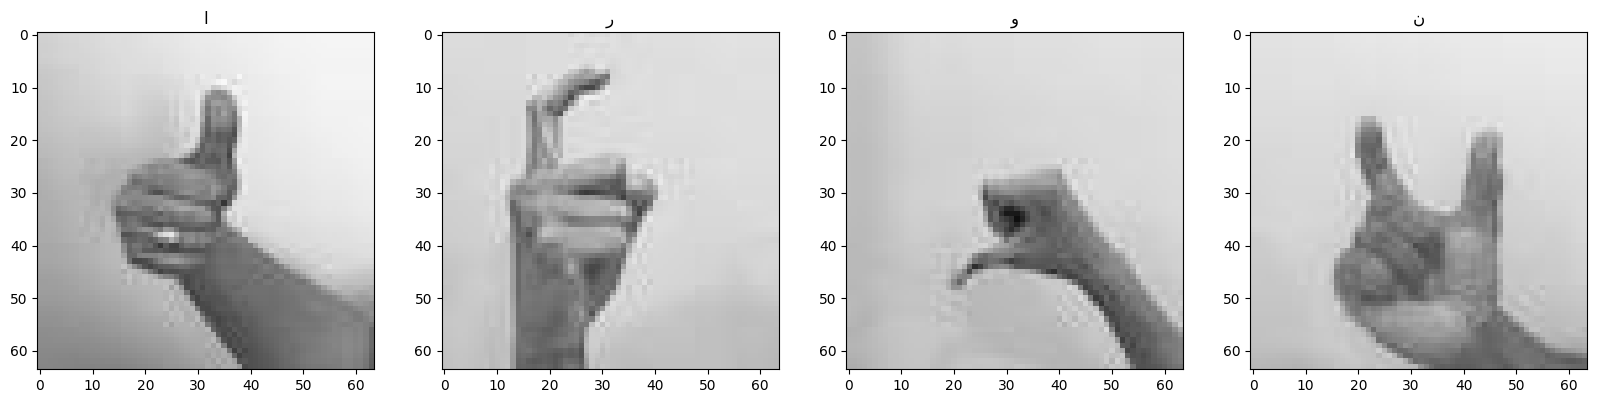

In [83]:
# Displaying the Images
for l1 in encoded:
    l1.reverse()
    fig, ax = plt.subplots(1, len(l1), figsize=(20, 20))
    for i in range(len(l1)):
        ax[i].imshow(ArSL[l1[i]], cmap='gray')
        ax[i].set_title(guide[guide['Index'] == l1[i]]['Arabic_Letters'].iloc[0])
